# Final Project

Name: Yushan Wang
ID:   A14459085

# Abstract: 
 Several supervised learning methods have been learned and implemented in the lectures of COGS 118A. This document presents a ranking of four supervised learning methods: SVMs, Logistic Regression, Decision Tree, KNN. The experiment  uses four data sets with different magnitudes as a variety of performance criteria to evaluate the four learning methods

# Pre Import

In [1]:
#import all the packages needed for the project
%config InlineBackend.figure_format = 'retina' 
import numpy as np
import pandas as pd
import os
import scipy.stats as stats
from sklearn import datasets
from sklearn import svm
from sklearn.datasets import load_iris 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#import all the packages needed for data visualization

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier 

# Data source

The data sets used in this report are downloaded from Kaggle.
There are four data sets which have been used.

    Data Set 1: ex2data2.csv
    https://www.kaggle.com/msjaiclub/2classclassification
    using x and y predict labels

    Data Set 2: data_banknote_authentication.txt
    https://machinelearningmastery.com/standard-machine-learning-datasets/
    using Mean of the integrated profile and Mean of the DM-SNR curve to predict is there a pulsar star or not
    by setting exist = 1, otherwise = -1

    Data Set 3; winemag-data_first150k.csv
    https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
    using price and points to predict country by setting us = 1 others = -1
    
    Data Set 4: appstore_games.csv
    https://www.kaggle.com/tristan581/17k-apple-app-store-strategy-games
    using Average User Rating and User Rating Count to predict the game is free or not
    by setting free = -1 otherwise =1

# Import Database needed for the project

In [2]:
# import data set 1
data_one_name = 'ex2data2.csv'
data_one = pd.read_csv(data_one_name)
data_one = data_one.rename(columns={'x': 1, 'y': 2,'label': 3})
data_one[3][data_one[3] != 1] = -1
#preview of partial data 
data_one.head(5)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


1        2  3
0  0.051267  0.69956  1
1 -0.092742  0.68494  1
2 -0.213710  0.69225  1
3 -0.375000  0.50219  1
4 -0.513250  0.46564  1

In [3]:
#import data set 2
data_two_name = 'data_banknote_authentication.txt'
data_two = pd.read_csv(data_two_name, sep =',',names=[1, 2, 3,4,5])
#preview of partial data
data_two.head(5)

1       2       3        4  5
0  3.62160  8.6661 -2.8073 -0.44699  0
1  4.54590  8.1674 -2.4586 -1.46210  0
2  3.86600 -2.6383  1.9242  0.10645  0
3  3.45660  9.5228 -4.0112 -3.59440  0
4  0.32924 -4.4552  4.5718 -0.98880  0

In [4]:
features = [1, 2, 3,4]
x = data_two.loc[:,features].values
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = [1,2])
targets = []
for each in data_two[5]:
    if each == 0:
        targets.append(int(-1))
    else:
        targets.append(int(1))
principalDf[3] = targets
data_two = principalDf
data_two.head(5)

1         2  3
0 -8.117954 -2.372615 -1
1 -7.800124 -2.689555 -1
2  3.690195 -4.372720 -1
3 -9.908612 -0.978030 -1
4  6.957545 -0.733813 -1

In [5]:
#import data set 3
data_three_name = 'MAGIC_Gamma_Telescope_Data.csv'
data_three = pd.read_csv(data_three_name)
#preview of partial data
data_three.head(5)

Flength    Fwidth   Fsize   Fconc  Fconc1     Fasym  Fm3long  Fm3trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    Falpha     Fdist Class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [6]:
# data preperation for data set 3
features = list(data_three.columns)
target_name = features.pop()

x = data_three.loc[:,features].values
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = [1,2])
targets = []
for each in data_three[target_name]:
    if each == 'g':
        targets.append(int(-1))
    else:
        targets.append(int(1))
principalDf[3] = targets
data_three = principalDf
data_three.head(5)

1          2  3
0 -117.847561  14.908435 -1
1  -10.030204 -39.384964 -1
2   58.822043 -40.773779 -1
3  -86.684872  12.502957 -1
4  147.281560 -75.051486 -1

In [7]:
#import data set 3
data_four_name = 'Skin_NonSkin.txt'
data_four = pd.read_csv(data_four_name,delimiter='\t', header=None, names=[1, 2, 3,4])
#preview of partial data 
data_four.head(5)

1   2    3  4
0  74  85  123  1
1  73  84  122  1
2  72  83  121  1
3  70  81  119  1
4  70  81  119  1

In [8]:
# data preperation for data set 4
sorted(data_four)
features = list(data_four.columns)
features.pop()

x = data_four.loc[:,features].values
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = [1,2])
targets = []
for each in data_four[4]:
    if each == 2:
        targets.append(int(-1))
    else:
        targets.append(int(1))
principalDf[3] = targets
data_four = principalDf
data_four.head(5)

1          2  3
0 -54.534011  43.056629  1
1 -56.262857  43.161601  1
2 -57.991704  43.266572  1
3 -61.449398  43.476516  1
4 -61.449398  43.476516  1

In [9]:
print(data_one.shape)      # it should be (118,3)
print(data_two.shape)      # it should be (17898, 3)
print(data_three.shape)    # it should be (150930, 3)
print(data_four.shape)     # it should be 97561, 3)

(118, 3)
(1372, 3)
(19020, 3)
(245057, 3)


# Six classifiers on data set 1
    1.Logistic Regression
    
    2.Decision Tree Classifier
    
    3.Gaussian Naive Bayes
    
    4.SVC
    
    5.KNN the best k out of 26 trials (range from 1 to size(dataset))
    
    6.Voting classifier (best from hard and soft)

In [10]:
clf1 = LogisticRegression(random_state=1, solver='lbfgs')
clf2 = DecisionTreeClassifier()
clf3 = GaussianNB()
clf4 = SVC(kernel ='rbf')
clf5 = KNeighborsClassifier(n_neighbors=1)
estimator = [('LR',clf1),('DT',clf2),('Gaussian',clf3),('SVM',clf4),('KNN',clf5)] 
clf6 = VotingClassifier(estimators = estimator, voting ='hard') 

classifiers = [clf1, clf2, clf3, clf4,clf5,clf6]

# visualization

In [11]:
 def vis(X, Y, W=None, b=None):     
        indices_neg1 = (Y == -1).nonzero()[0]     
        indices_pos1 = (Y == 1).nonzero()[0]     
        plt.scatter(X[:,0][indices_neg1], X[:,1][indices_neg1],                  
                    c='blue', label='class -1')     
        plt.scatter(X[:,0][indices_pos1], X[:,1][indices_pos1],                  
                    c='red', label='class 1')     
        plt.legend()     
        plt.xlabel('$x_0$')     
        plt.ylabel('$x_1$')          
        if W is not None:         
            # w0x0+w1x1+b=0 => x1=-w0x0/w1-b/w1         
            w0 = W[0]         
            w1 = W[1]         
            temp = -w1*np.array([X[:,1].min(), X[:,1].max()])/w0-b/w0         
            x0_min = max(temp.min(), X[:,0].min())         
            x0_max = min(temp.max(), X[:,1].max())         
            x0 = np.linspace(x0_min,x0_max,100)         
            x1 = -w0*x0/w1-b/w1         
            plt.plot(x0,x1,color='black') 
        plt.show()

# error

In [12]:
def calc_error(X, Y, classifier):
    Y_pred = classifier.predict(X) 
    e = 1-accuracy_score(Y, Y_pred) 
    return e

# Classifiers on data set 1

(118, 2)
(118, 1)


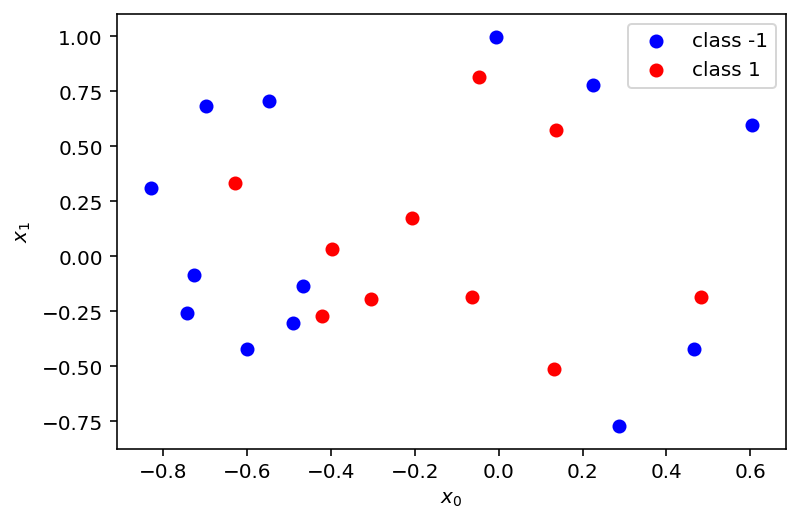

(23, 2)
(23,)


In [13]:
data_one = data_one.iloc[:,:]
X = data_one[[1,2]].values
Y = data_one[[3]].values
X_and_Y = np.hstack((X, Y)) # Stack them together for shuffling.
np.random.seed(1) # Set the random seed.
np.random.shuffle(X_and_Y) # Shuffle the data points in X_and_Y array
print(X.shape)      #(118,2)
print(Y.shape)      #(118,1)

X_shuffled = X_and_Y[:,:2]
Y_shuffled = X_and_Y[:,2]
Y_shuffled = Y_shuffled.astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X_shuffled,  
                                                    Y_shuffled,  
                                                    test_size = 0.80,  
                                                    random_state = 42) 
vis(X_train,Y_train)
print(X_train.shape)      
print(Y_train.shape)     

classifier: Logistic Regression
0.4526315789473685 & 0.3157894736842105& 0.45478723404255317
classifier: Decision Tree Classifier
0.5684210526315789 & 0.594059405940594& 0.5678191489361702
classifier: Gaussian Naive Bayes
0.6 & 0.4571428571428572& 0.6028368794326241
classifier: SVC
0.6526315789473685 & 0.5352112676056338& 0.6553634751773049
classifier: KNN
0.6947368421052632 & 0.7010309278350516& 0.6945921985815604
classifier: Voting
0.6210526315789474 & 0.5& 0.6236702127659575


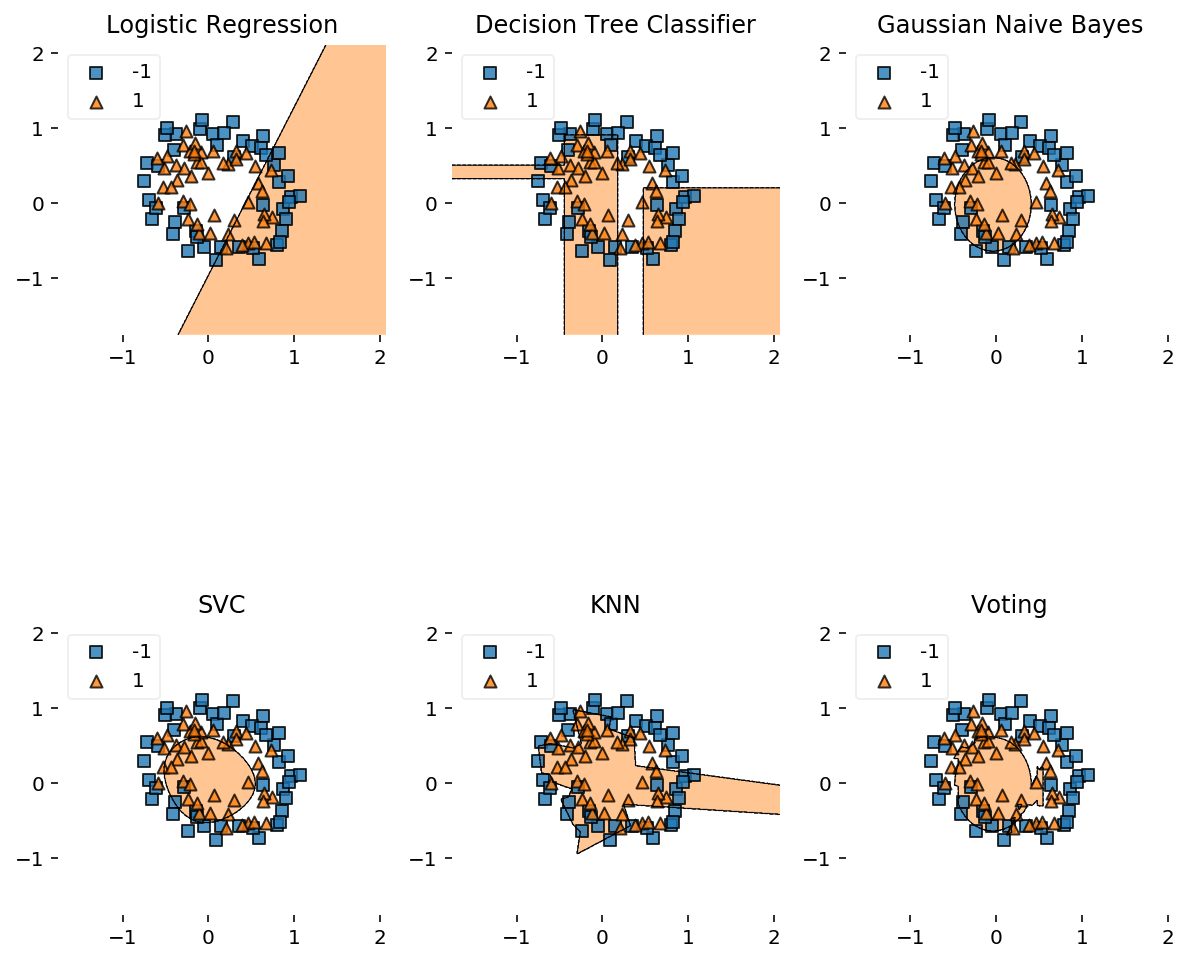

In [14]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

gs = gridspec.GridSpec(nrows=2, ncols=3, hspace =1)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression','Decision Tree Classifier','Gaussian Naive Bayes','SVC','KNN','Voting']

#labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip(classifiers,
                         labels,
                         itertools.product([0,1],[0,1,2])):

    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test) 
    print('classifier: {}'.format(lab))
    acc1 = 1-calc_error(X_test,Y_test, clf)
    f1 = f1_score(Y_test, Y_pred, average = 'binary')
    roc1 = roc_auc_score(Y_test, Y_pred)
    print('{} &'.format(acc1),'{}&'.format(f1),'{}'.format(roc1))
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_test, y=Y_test, clf=clf, legend=2)
    plt.title(lab)
    
plt.show()

(118, 2)
(118, 1)


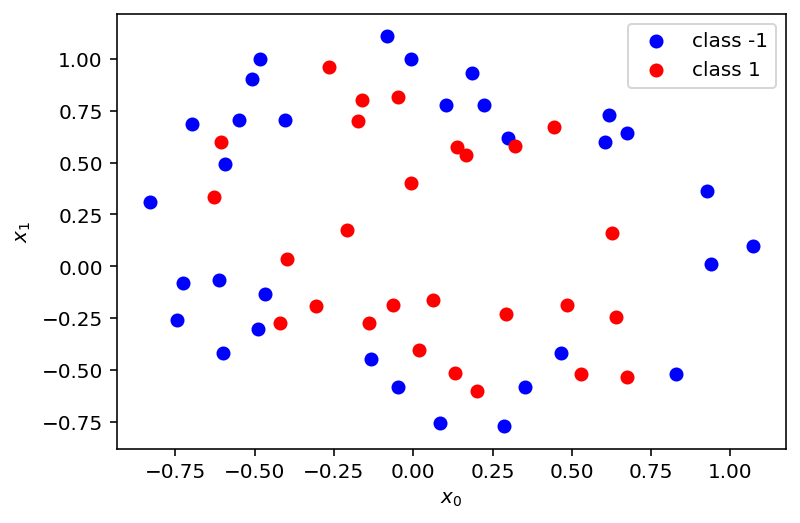

(59, 2)
(59,)


In [15]:
data_one = data_one.iloc[:,:]
X = data_one[[1,2]].values
Y = data_one[[3]].values
X_and_Y = np.hstack((X, Y)) # Stack them together for shuffling.
np.random.seed(1) # Set the random seed.
np.random.shuffle(X_and_Y) # Shuffle the data points in X_and_Y array
print(X.shape)      #(118,2)
print(Y.shape)      #(118,1)

X_shuffled = X_and_Y[:,:2]
Y_shuffled = X_and_Y[:,2]
Y_shuffled = Y_shuffled.astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X_shuffled,  
                                                    Y_shuffled,  
                                                    test_size = 0.50,  
                                                    random_state = 42) 
vis(X_train,Y_train)
print(X_train.shape)      
print(Y_train.shape)     

classifier: Logistic Regression
0.4067796610169492 & 0.2222222222222222& 0.4199308755760369
classifier: Decision Tree Classifier
0.7288135593220338 & 0.7575757575757576& 0.7246543778801843
classifier: Gaussian Naive Bayes
0.6271186440677966 & 0.56& 0.636520737327189
classifier: SVC
0.7796610169491526 & 0.7636363636363636& 0.7851382488479262
classifier: KNN
0.6440677966101694 & 0.6557377049180327& 0.6440092165898617
classifier: Voting
0.6949152542372882 & 0.689655172413793& 0.6975806451612904


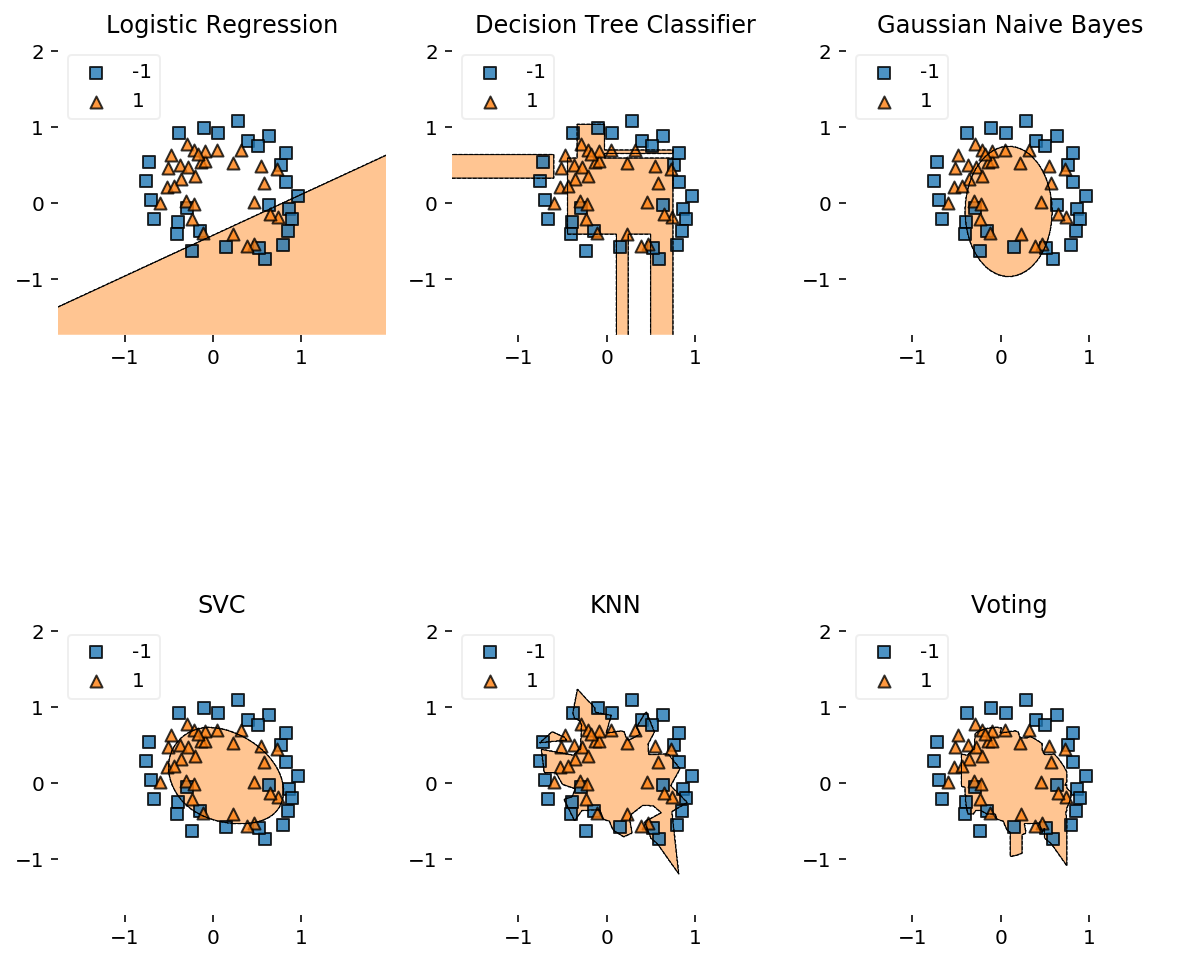

In [16]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

gs = gridspec.GridSpec(nrows=2, ncols=3, hspace =1)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression','Decision Tree Classifier','Gaussian Naive Bayes','SVC','KNN','Voting']

#labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip(classifiers,
                         labels,
                         itertools.product([0,1],[0,1,2])):

    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test) 
    print('classifier: {}'.format(lab))
    acc1 = 1-calc_error(X_test,Y_test, clf)
    f1 = f1_score(Y_test, Y_pred, average = 'binary')
    roc1 = roc_auc_score(Y_test, Y_pred)
    print('{} &'.format(acc1),'{}&'.format(f1),'{}'.format(roc1))
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_test, y=Y_test, clf=clf, legend=2)
    plt.title(lab)
    
plt.show()

(118, 2)
(118, 1)


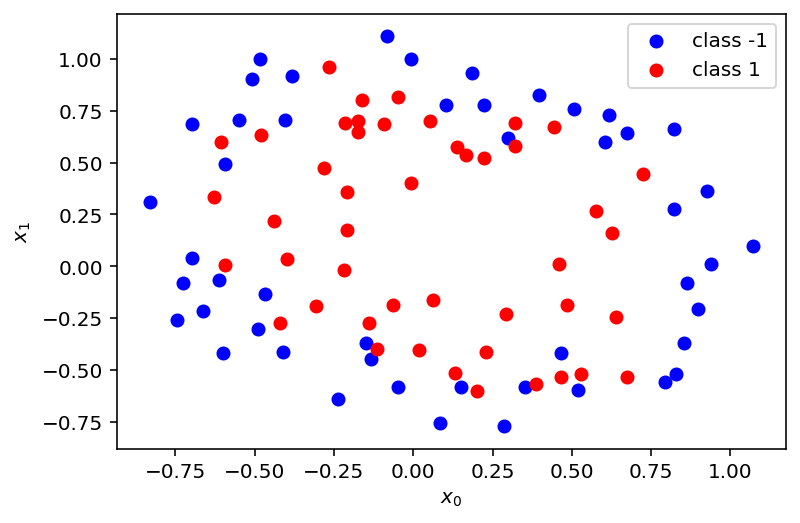

(94, 2)
(94,)


In [17]:
data_one = data_one.iloc[:,:]
X = data_one[[1,2]].values
Y = data_one[[3]].values
X_and_Y = np.hstack((X, Y)) # Stack them together for shuffling.
np.random.seed(1) # Set the random seed.
np.random.shuffle(X_and_Y) # Shuffle the data points in X_and_Y array
print(X.shape)      #(118,2)
print(Y.shape)      #(118,1)

X_shuffled = X_and_Y[:,:2]
Y_shuffled = X_and_Y[:,2]
Y_shuffled = Y_shuffled.astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X_shuffled,  
                                                    Y_shuffled,  
                                                    test_size = 0.20,  
                                                    random_state = 42) 
vis(X_train,Y_train)
print(X_train.shape)      
print(Y_train.shape)    

classifier: Logistic Regression
0.625 & 0.6086956521739131& 0.6250000000000001
classifier: Decision Tree Classifier
0.7916666666666666 & 0.8148148148148148& 0.7916666666666667
classifier: Gaussian Naive Bayes
0.625 & 0.6086956521739131& 0.6250000000000001
classifier: SVC
0.875 & 0.8799999999999999& 0.8749999999999999
classifier: KNN
0.7083333333333334 & 0.7407407407407408& 0.7083333333333334
classifier: Voting
0.7083333333333334 & 0.7199999999999999& 0.7083333333333334


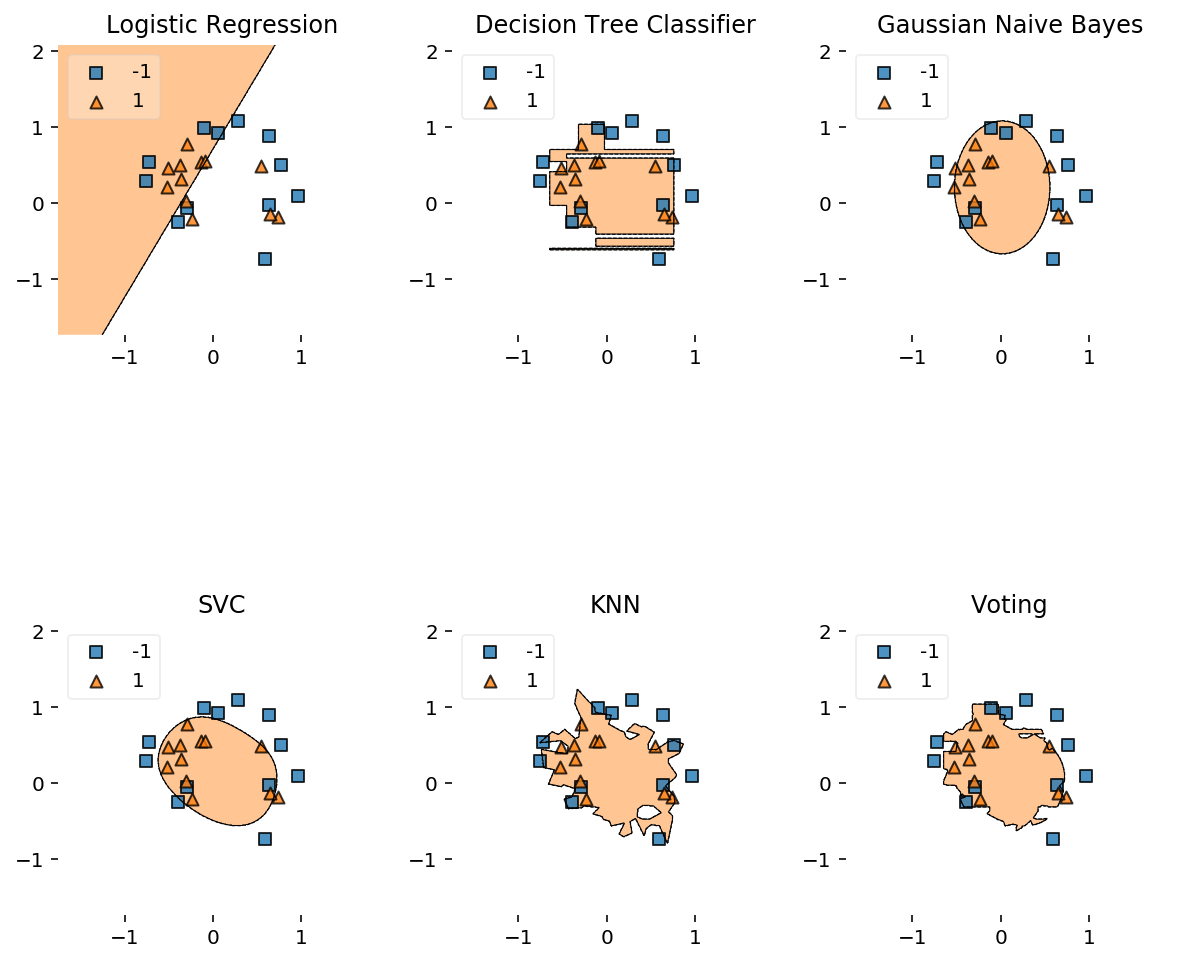

In [18]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

gs = gridspec.GridSpec(nrows=2, ncols=3, hspace =1)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression','Decision Tree Classifier','Gaussian Naive Bayes','SVC','KNN','Voting']

#labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip(classifiers,
                         labels,
                         itertools.product([0,1],[0,1,2])):

    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test) 
    print('classifier: {}'.format(lab))
    acc1 = 1-calc_error(X_test,Y_test, clf)
    f1 = f1_score(Y_test, Y_pred, average = 'binary')
    roc1 = roc_auc_score(Y_test, Y_pred)
    print('{} &'.format(acc1),'{}&'.format(f1),'{}'.format(roc1))
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_test, y=Y_test, clf=clf, legend=2)
    plt.title(lab)
    
plt.show()

# Bonus for data 1

The dataset is clearly a non-linear dataset and consists of two features (say, X and Y).

In order to use SVM for classifying this data, introduce another feature Z = X1^2 + X2^2 into the dataset. 
Thus, projecting the 2-dimensional data into 3-dimensional space. 
The first dimension representing the feature X1, second representing X2 
and third representing Z (which, mathematically, is equal to the radius of the circle of which the point (x1, x2) is a part of). 

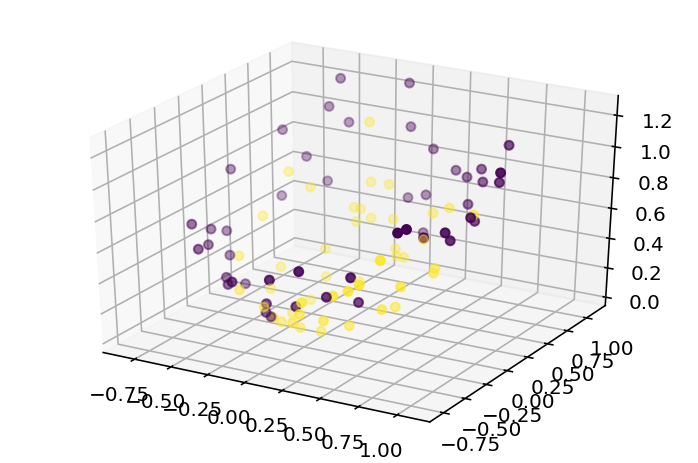

In [19]:
from mpl_toolkits.mplot3d import Axes3D 
X1 = X_train[:, 0].reshape((-1, 1)) 
X2 = X_train[:, 1].reshape((-1, 1)) 
X3 = (X1**2 + X2**2) 
X_train = np.hstack((X_train, X3))

fig = plt.figure() 
axes = fig.add_subplot(111, projection = '3d') 
axes.scatter(X1, X2, X1**2 + X2**2, c = Y_train, depthshade = True) 
plt.show() 

C = 0.1


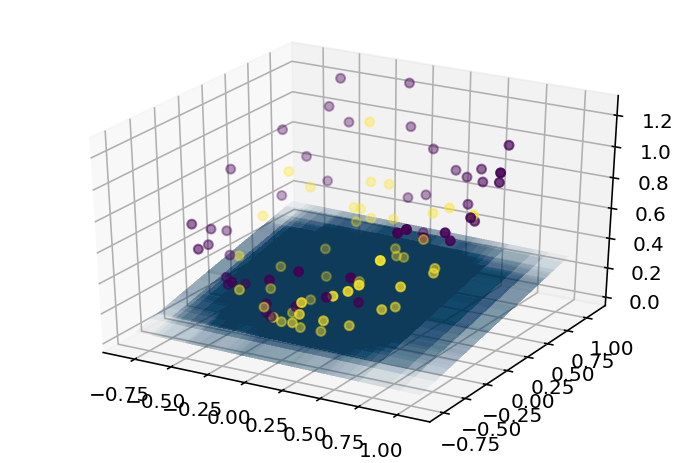

Training error: 0.3936170212765957




C = 1


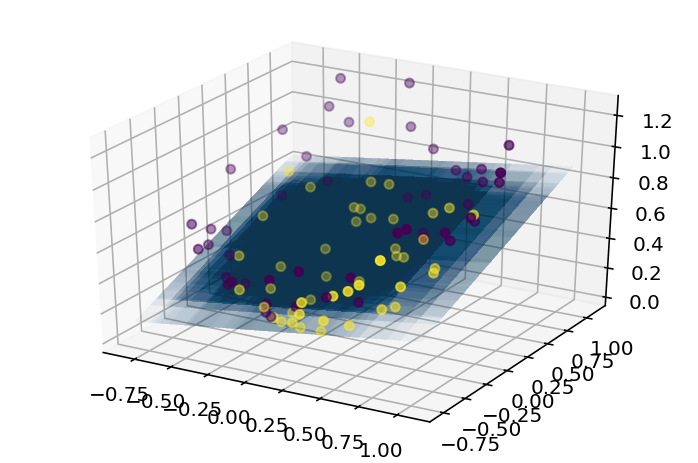

Training error: 0.19148936170212771




C = 10


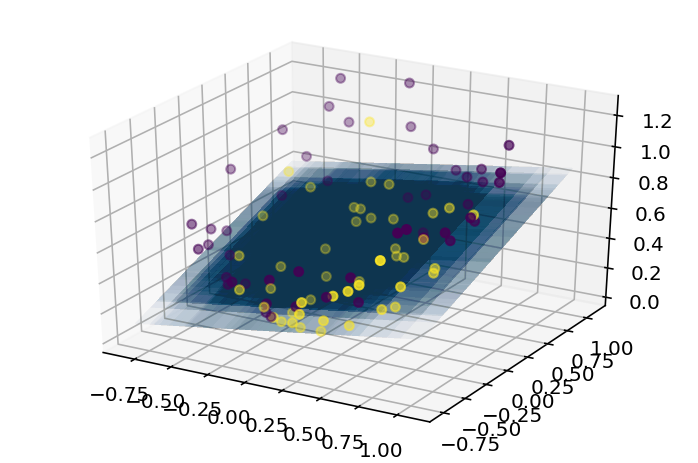

Training error: 0.19148936170212771




C = 100


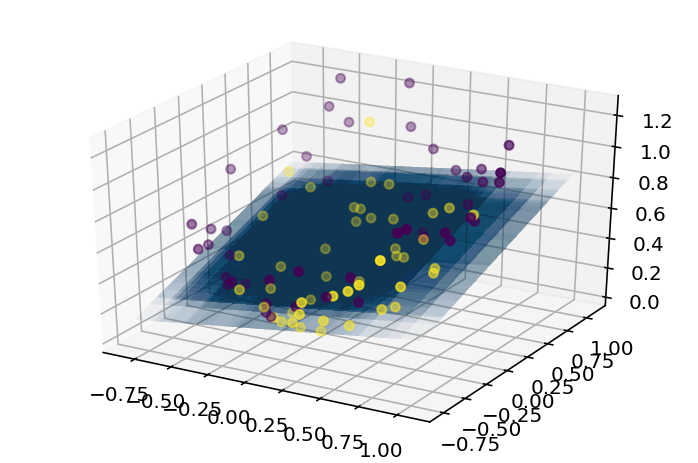

Training error: 0.19148936170212771




C = 1000


C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


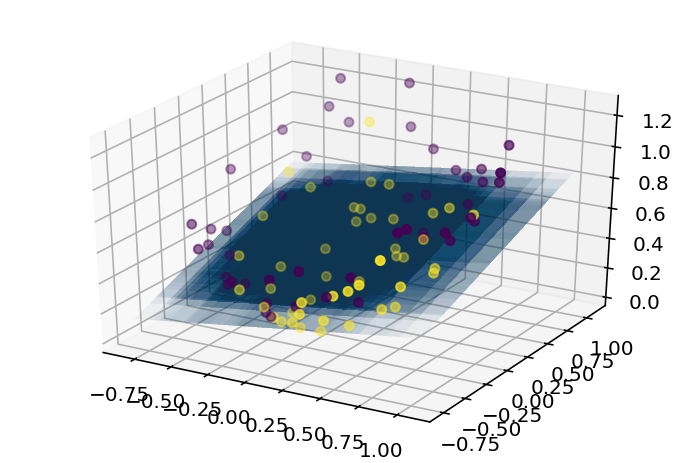

Training error: 0.19148936170212771






In [20]:
from sklearn import svm 

C_list = [0.1, 1, 10, 100, 1000]
opt_e_training = 1.0 # Optimal training error.
opt_classifier = None # Optimal classifier.
opt_C = None # Optimal C.
for C in C_list:

    classifier = svm.LinearSVC(random_state = 0, loss='hinge', max_iter = 10000, C=C )
    classifier.fit(X_train, Y_train)
    W = classifier.coef_
    b = classifier.intercept_
    # Show decision boundary, training error and test error.
    print('C = {}'.format(C))
    x1 = X_train[:, 0].reshape((-1, 1)) 
    x2 = X_train[:, 1].reshape((-1, 1)) 
    x1, x2 = np.meshgrid(x1, x2) 
    x3 = -(W[0][0]*x1 + W[0][1]*x2 + b) / W[0][2] 
  
    fig = plt.figure() 
    axes2 = fig.add_subplot(111, projection = '3d') 
    axes2.scatter(X1, X2, X1**2 + X2**2, c = Y_train, depthshade = True) 
    axes1 = fig.gca(projection = '3d') 
    axes1.plot_surface(x1, x2, x3, alpha = 0.01) 
    plt.show() 
    e_training = calc_error(X_train, Y_train, classifier)
    print('Training error: {}'.format(e_training))
    print('\n\n\n')
    # Judge if it is the optimal one.
    if e_training < opt_e_training:
        opt_e_training = e_training
        opt_classifier = classifier
        opt_C = C

Best parameter C* = 1


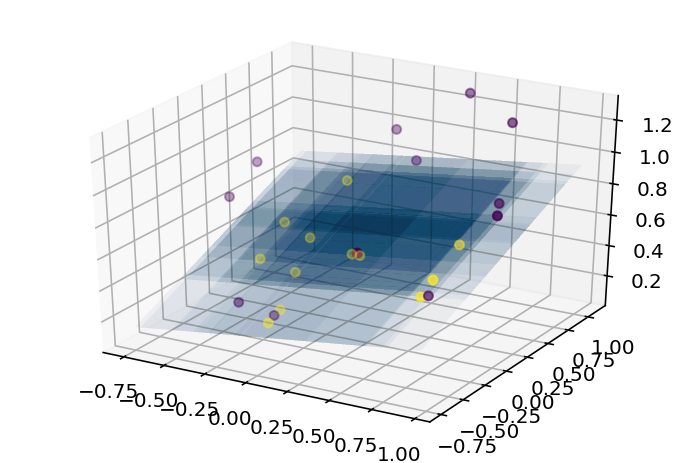

Test error: 0.20833333333333337


In [21]:
X1 = X_test[:, 0].reshape((-1, 1)) 
X2 = X_test[:, 1].reshape((-1, 1)) 
X3 = (X1**2 + X2**2) 
X_test = np.hstack((X_test, X3))

opt_W = opt_classifier.coef_
opt_b = opt_classifier.intercept_
print('Best parameter C* = {}'.format(opt_C))

x1, x2 = np.meshgrid(X1, X2) 
x3 = -(opt_W[0][0]*x1 + opt_W[0][1]*x2 + opt_b) / opt_W[0][2] 

fig = plt.figure() 
axes2 = fig.add_subplot(111, projection = '3d') 
axes2.scatter(X1, X2, X3, c = Y_test, depthshade = True) 
axes1 = fig.gca(projection = '3d') 
axes1.plot_surface(x1, x2, x3, alpha = 0.01) 
plt.show() 
print('Test error: {}'.format(calc_error(X_test, Y_test, classifier)))

# Classifiers on data set 2

(1372, 2)
(1372, 1)


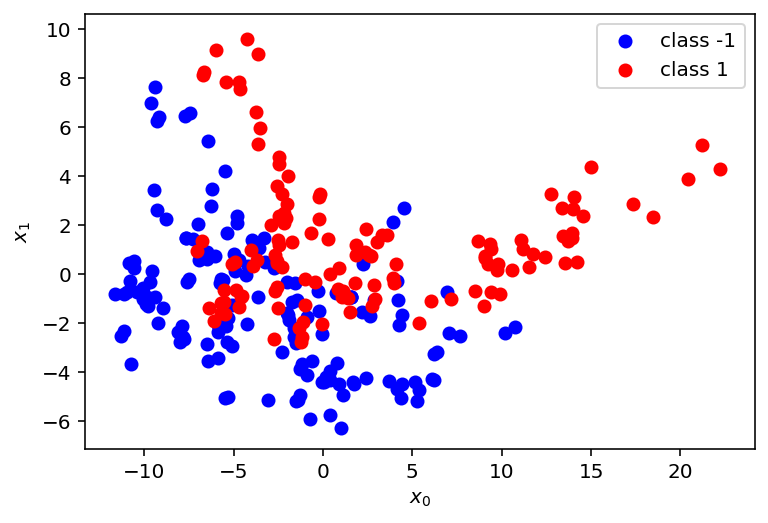

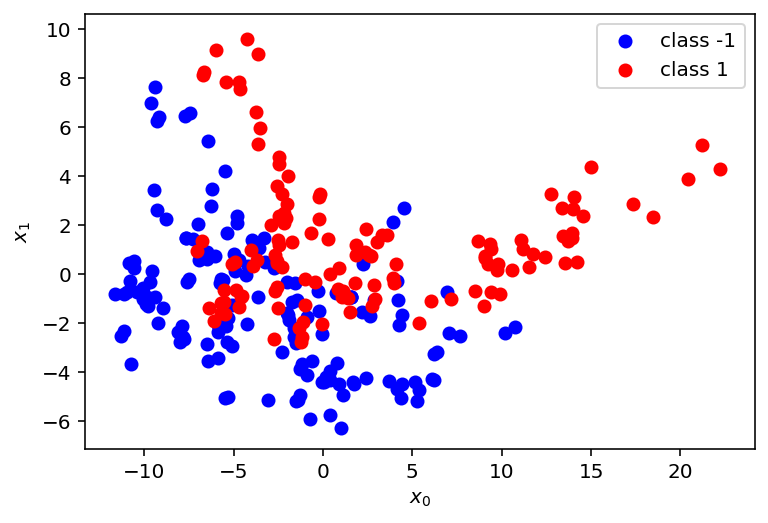

(274, 2)
(274,)


In [22]:
data_two = data_two.iloc[:,:]
X2 = data_two[[1,2]].values
Y2 = data_two[[3]].values
X_and_Y2 = np.hstack((X2, Y2)) # Stack them together for shuffling.
np.random.seed(1) # Set the random seed.
np.random.shuffle(X_and_Y2) # Shuffle the data points in X_and_Y array
print(X2.shape)      
print(Y2.shape)     

X_shuffled2 = X_and_Y2[:,:2]
Y_shuffled2 = X_and_Y2[:,2]
Y_shuffled2 = Y_shuffled2.astype(int)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_shuffled2,  
                                                    Y_shuffled2,  
                                                    test_size = 0.80,  
                                                    random_state = 42) 
vis(X_train2,Y_train2)
vis(X_train2,Y_train2)
print(X_train2.shape)      
print(Y_train2.shape)     

classifier: Logistic Regression
0.738615664845173 & 0.7092198581560284& 0.7369774140576628
classifier: Decision Tree Classifier
0.8096539162112932 & 0.7895266868076537& 0.8096818047217811
classifier: Gaussian Naive Bayes
0.7158469945355191 & 0.6637931034482759& 0.7074326325140657
classifier: SVC
0.8005464480874317 & 0.7798994974874371& 0.8006635798314804
classifier: KNN
0.8397085610200364 & 0.8236472945891784& 0.8407105553611328
classifier: Voting
0.7896174863387978 & 0.7555555555555556& 0.7841110991466337


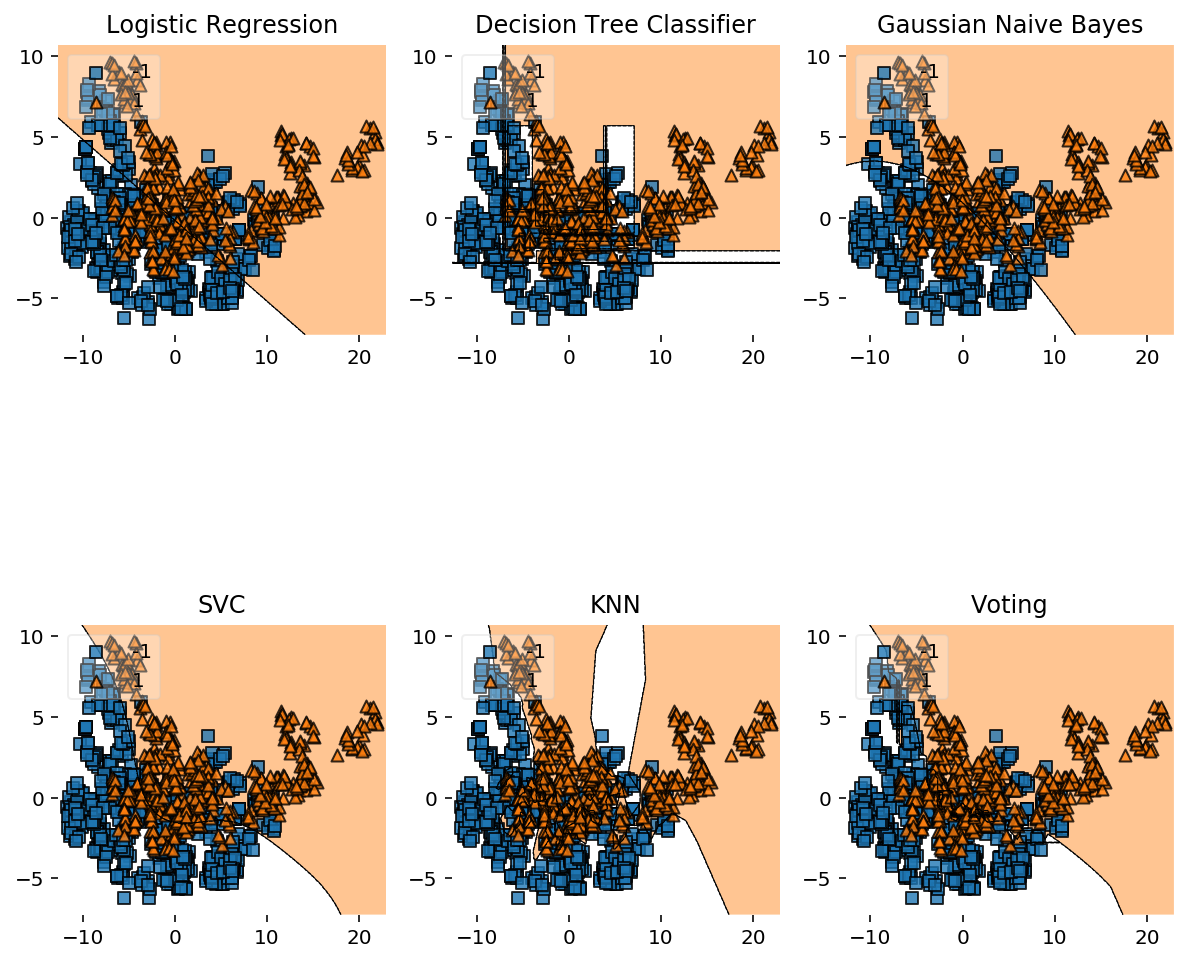

In [23]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

gs = gridspec.GridSpec(nrows=2, ncols=3, hspace =1)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression','Decision Tree Classifier','Gaussian Naive Bayes','SVC','KNN','Voting']

#labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip(classifiers,
                         labels,
                         itertools.product([0,1],[0,1,2])):

    clf.fit(X_train2, Y_train2)
    Y_pred2 = clf.predict(X_test2) 
    print('classifier: {}'.format(lab))
    acc1 = 1-calc_error(X_test2,Y_test2, clf)
    f1 = f1_score(Y_test2, Y_pred2, average = 'binary')
    roc1 = roc_auc_score(Y_test2, Y_pred2)
    print('{} &'.format(acc1),'{}&'.format(f1),'{}'.format(roc1))
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_test2, y=Y_test2, clf=clf, legend=2)
    plt.title(lab)
    
plt.show()

(1372, 2)
(1372, 1)


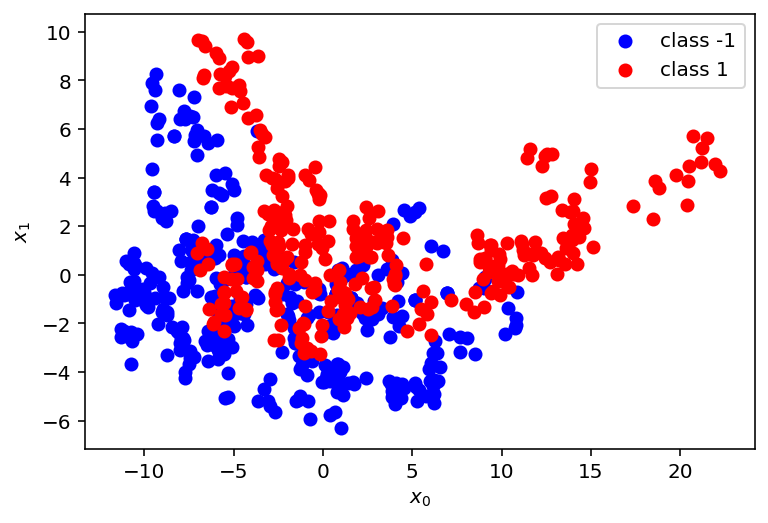

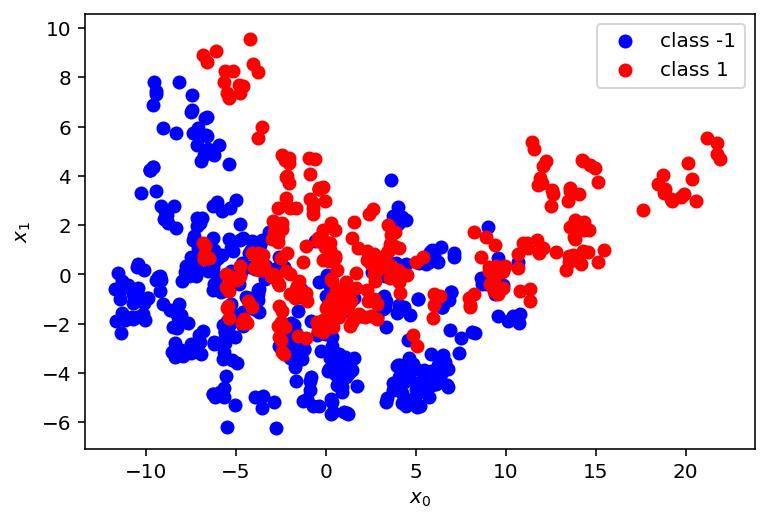

(686, 2)
(686,)


In [24]:
data_two = data_two.iloc[:,:]
X2 = data_two[[1,2]].values
Y2 = data_two[[3]].values
X_and_Y2 = np.hstack((X2, Y2)) # Stack them together for shuffling.
np.random.seed(1) # Set the random seed.
np.random.shuffle(X_and_Y2) # Shuffle the data points in X_and_Y array
print(X2.shape)      
print(Y2.shape)     

X_shuffled2 = X_and_Y2[:,:2]
Y_shuffled2 = X_and_Y2[:,2]
Y_shuffled2 = Y_shuffled2.astype(int)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_shuffled2,  
                                                    Y_shuffled2,  
                                                    test_size = 0.50,  
                                                    random_state = 42) 
vis(X_train2,Y_train2)
vis(X_test2,Y_test2)
print(X_train2.shape)      
print(Y_train2.shape)     

classifier: Logistic Regression
0.7230320699708455 & 0.6654929577464788& 0.7129221032554509
classifier: Decision Tree Classifier
0.8061224489795918 & 0.7710843373493976& 0.8003771294811218
classifier: Gaussian Naive Bayes
0.7011661807580175 & 0.6238532110091743& 0.6858338029390091
classifier: SVC
0.8163265306122449 & 0.7827586206896552& 0.8105769647579003
classifier: KNN
0.8294460641399417 & 0.801358234295416& 0.8258312020460358
classifier: Voting
0.8032069970845481 & 0.7576301615798922& 0.7924097273397199


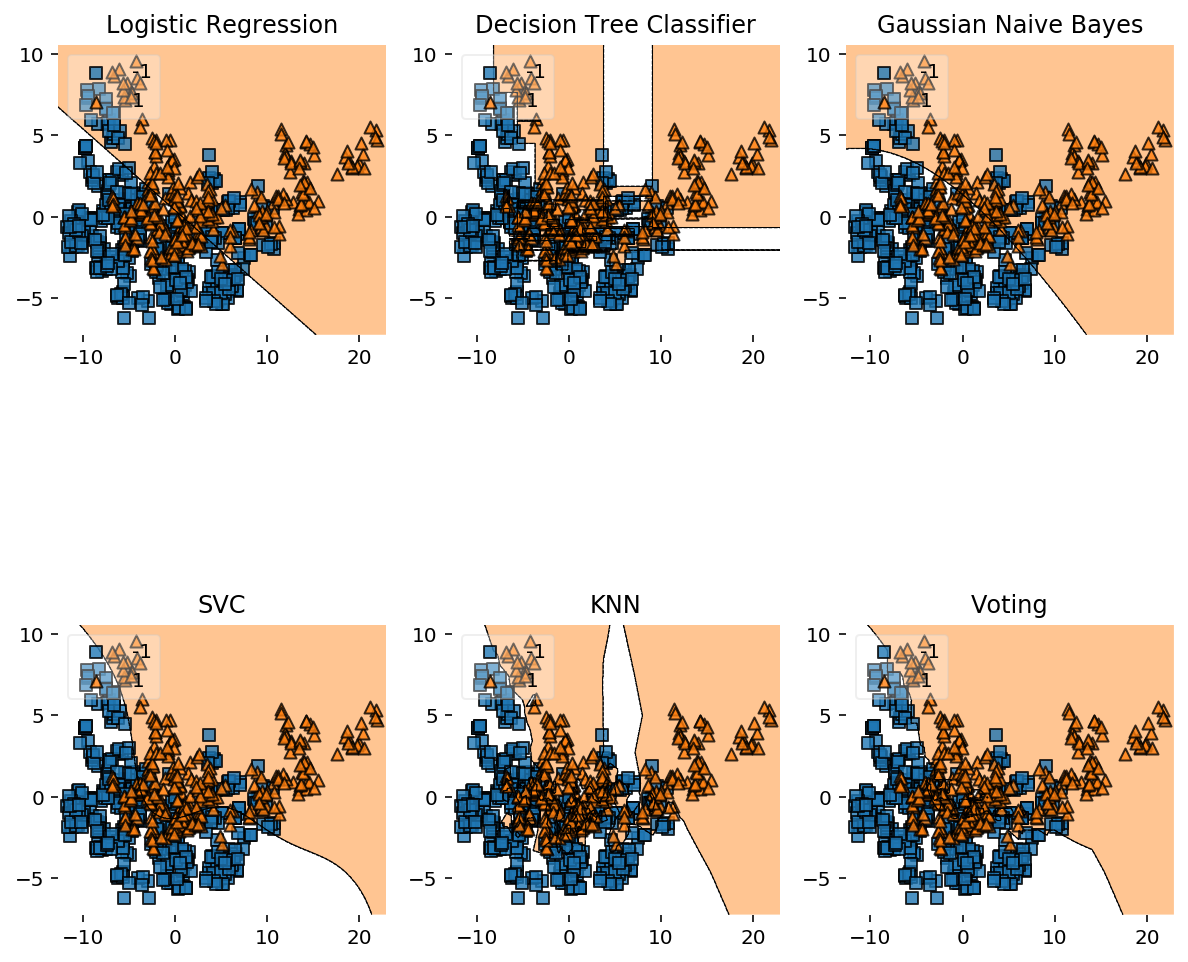

In [25]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

gs = gridspec.GridSpec(nrows=2, ncols=3, hspace =1)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression','Decision Tree Classifier','Gaussian Naive Bayes','SVC','KNN','Voting']

#labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip(classifiers,
                         labels,
                         itertools.product([0,1],[0,1,2])):

    clf.fit(X_train2, Y_train2)
    Y_pred2 = clf.predict(X_test2) 
    print('classifier: {}'.format(lab))
    acc1 = 1-calc_error(X_test2,Y_test2, clf)
    f1 = f1_score(Y_test2, Y_pred2, average = 'binary')
    roc1 = roc_auc_score(Y_test2, Y_pred2)
    print('{} &'.format(acc1),'{}&'.format(f1),'{}'.format(roc1))
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_test2, y=Y_test2, clf=clf, legend=2)
    plt.title(lab)
    
plt.show()

(1372, 2)
(1372, 1)


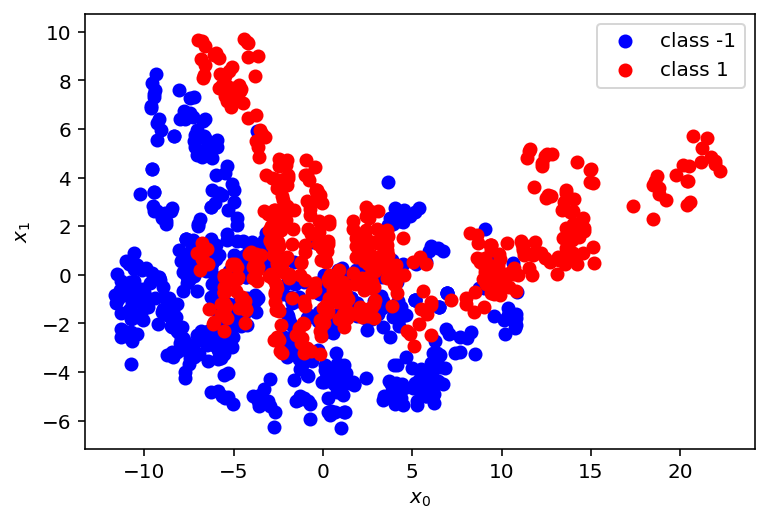

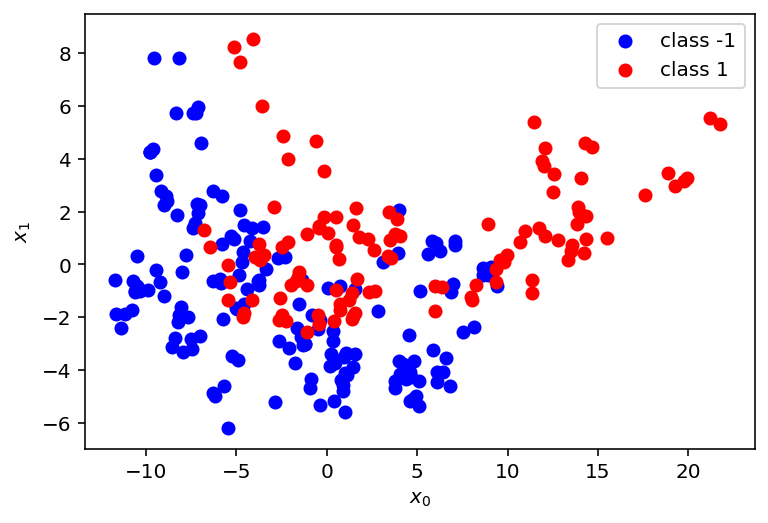

(1097, 2)
(1097,)


In [26]:
data_two = data_two.iloc[:,:]
X2 = data_two[[1,2]].values
Y2 = data_two[[3]].values
X_and_Y2 = np.hstack((X2, Y2)) # Stack them together for shuffling.
np.random.seed(1) # Set the random seed.
np.random.shuffle(X_and_Y2) # Shuffle the data points in X_and_Y array
print(X2.shape)      
print(Y2.shape)     

X_shuffled2 = X_and_Y2[:,:2]
Y_shuffled2 = X_and_Y2[:,2]
Y_shuffled2 = Y_shuffled2.astype(int)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_shuffled2,  
                                                    Y_shuffled2,  
                                                    test_size = 0.20,  
                                                    random_state = 42) 
vis(X_train2,Y_train2)
vis(X_test2,Y_test2)
print(X_train2.shape)      
print(Y_train2.shape)     

classifier: Logistic Regression
0.7563636363636363 & 0.6883720930232557& 0.7404891304347826
classifier: Decision Tree Classifier
0.8363636363636363 & 0.7963800904977375& 0.8263586956521738
classifier: Gaussian Naive Bayes
0.7236363636363636 & 0.6346153846153847& 0.7025815217391305
classifier: SVC
0.8327272727272728 & 0.8083333333333333& 0.8342391304347825
classifier: KNN
0.8581818181818182 & 0.8251121076233184& 0.8500000000000001
classifier: Voting
0.8254545454545454 & 0.7777777777777777& 0.8120923913043478


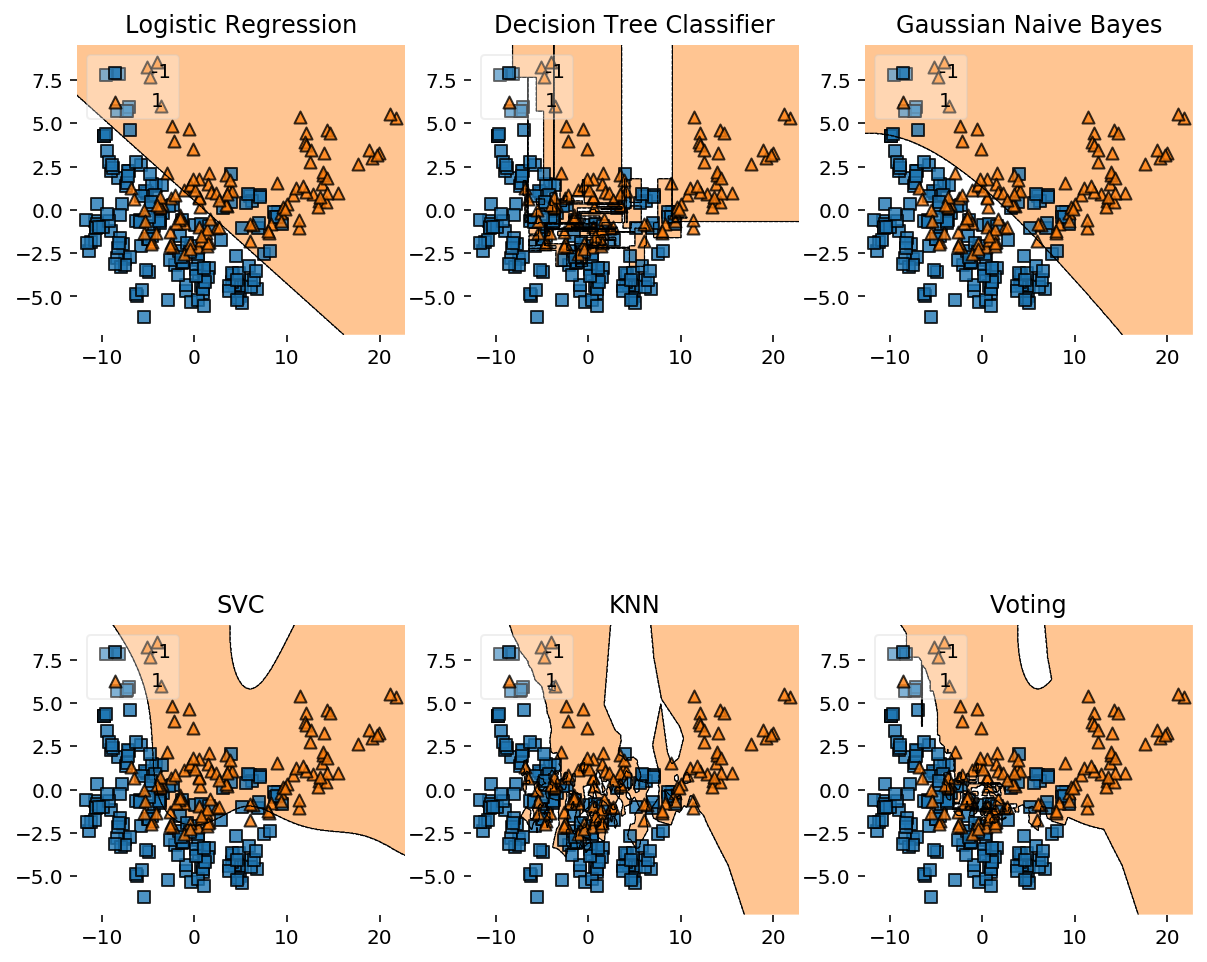

In [27]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

gs = gridspec.GridSpec(nrows=2, ncols=3, hspace =1)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression','Decision Tree Classifier','Gaussian Naive Bayes','SVC','KNN','Voting']

#labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip(classifiers,
                         labels,
                         itertools.product([0,1],[0,1,2])):

    clf.fit(X_train2, Y_train2)
    Y_pred2 = clf.predict(X_test2) 
    print('classifier: {}'.format(lab))
    acc1 = 1-calc_error(X_test2,Y_test2, clf)
    f1 = f1_score(Y_test2, Y_pred2, average = 'binary')
    roc1 = roc_auc_score(Y_test2, Y_pred2)
    print('{} &'.format(acc1),'{}&'.format(f1),'{}'.format(roc1))
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_test2, y=Y_test2, clf=clf, legend=2)
    plt.title(lab)
    
plt.show()

# Classifiers on data set 3

(19020, 2)
(19020, 1)


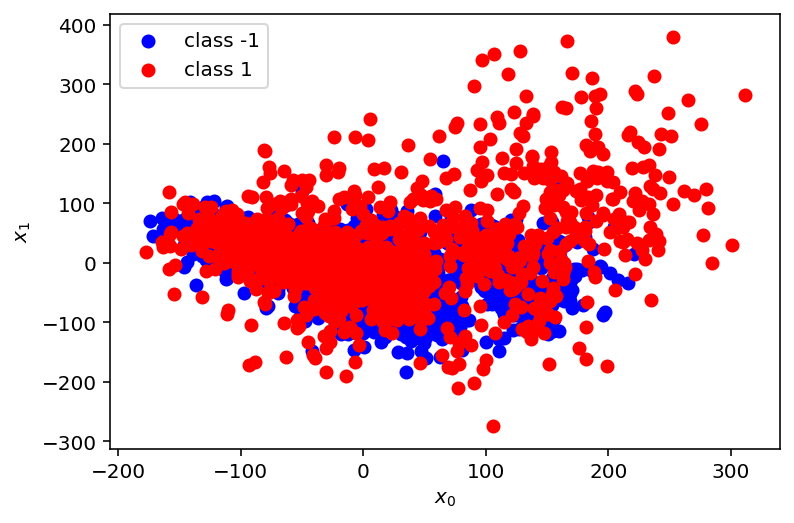

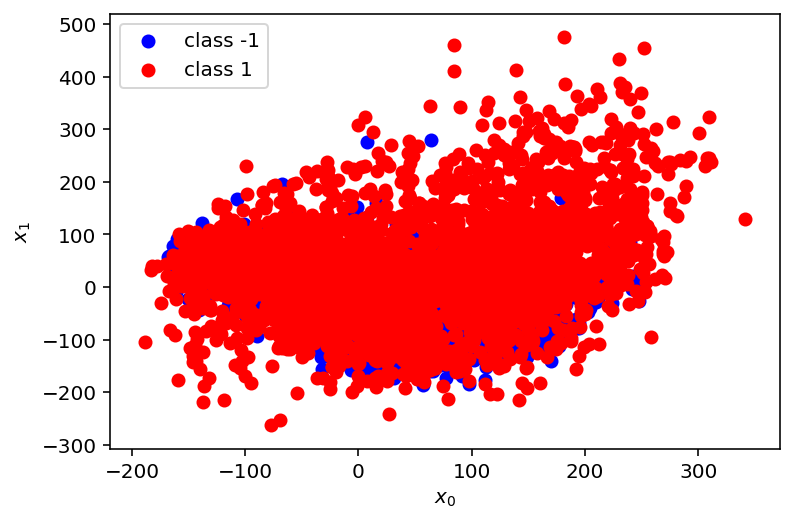

(3804, 2)
(15216,)


In [28]:
data_three = data_three.iloc[:,:]
X3 = data_three[[1,2]].values
Y3 = data_three[[3]].values
X_and_Y3 = np.hstack((X3, Y3)) # Stack them together for shuffling.
np.random.seed(1) # Set the random seed.
np.random.shuffle(X_and_Y3) # Shuffle the data points in X_and_Y array
print(X3.shape)      #(17898,2)
print(Y3.shape)      #(17898,1)

X_shuffled3 = X_and_Y3[:,:2]
Y_shuffled3 = X_and_Y3[:,2]
Y_shuffled3 = Y_shuffled3.astype(int)
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X_shuffled3,  
                                                    Y_shuffled3,  
                                                    test_size = 0.80,  
                                                    random_state = 42) 
vis(X_train3,Y_train3)
vis(X_test3, Y_test3)
print(X_train3.shape)      
print(Y_test3.shape) 

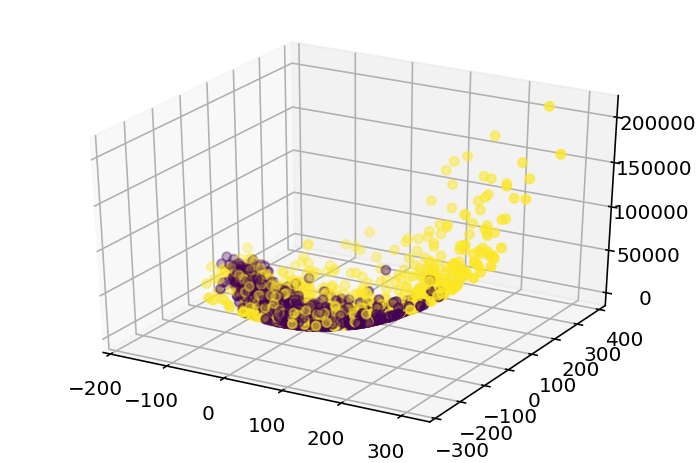

In [29]:
from mpl_toolkits.mplot3d import Axes3D 
X_train = X_train3
Y_train = Y_train3
X1 = X_train[:, 0].reshape((-1, 1)) 
X2 = X_train[:, 1].reshape((-1, 1)) 
X3 = (X1**2 + X2**2) 
X_train = np.hstack((X_train, X3))

fig = plt.figure() 
axes = fig.add_subplot(111, projection = '3d') 
axes.scatter(X1, X2, X1**2 + X2**2, c = Y_train, depthshade = True) 
plt.show() 

classifier: Logistic Regression
0.706953207150368 & 0.35961510843027433& 0.5995034454809149
classifier: Decision Tree Classifier
0.6198080967402734 & 0.45848544416362447& 0.5825291628899641
classifier: Gaussian Naive Bayes
0.6938091482649842 & 0.4067235451419839& 0.6038710682961044
classifier: SVC
0.715102523659306 & 0.3622186258643519& 0.6049215429572302
classifier: KNN
0.6259858044164038 & 0.4584641735655152& 0.5856220192824013
classifier: Voting
0.7130651945320715 & 0.38800112139052423& 0.6097910724508314


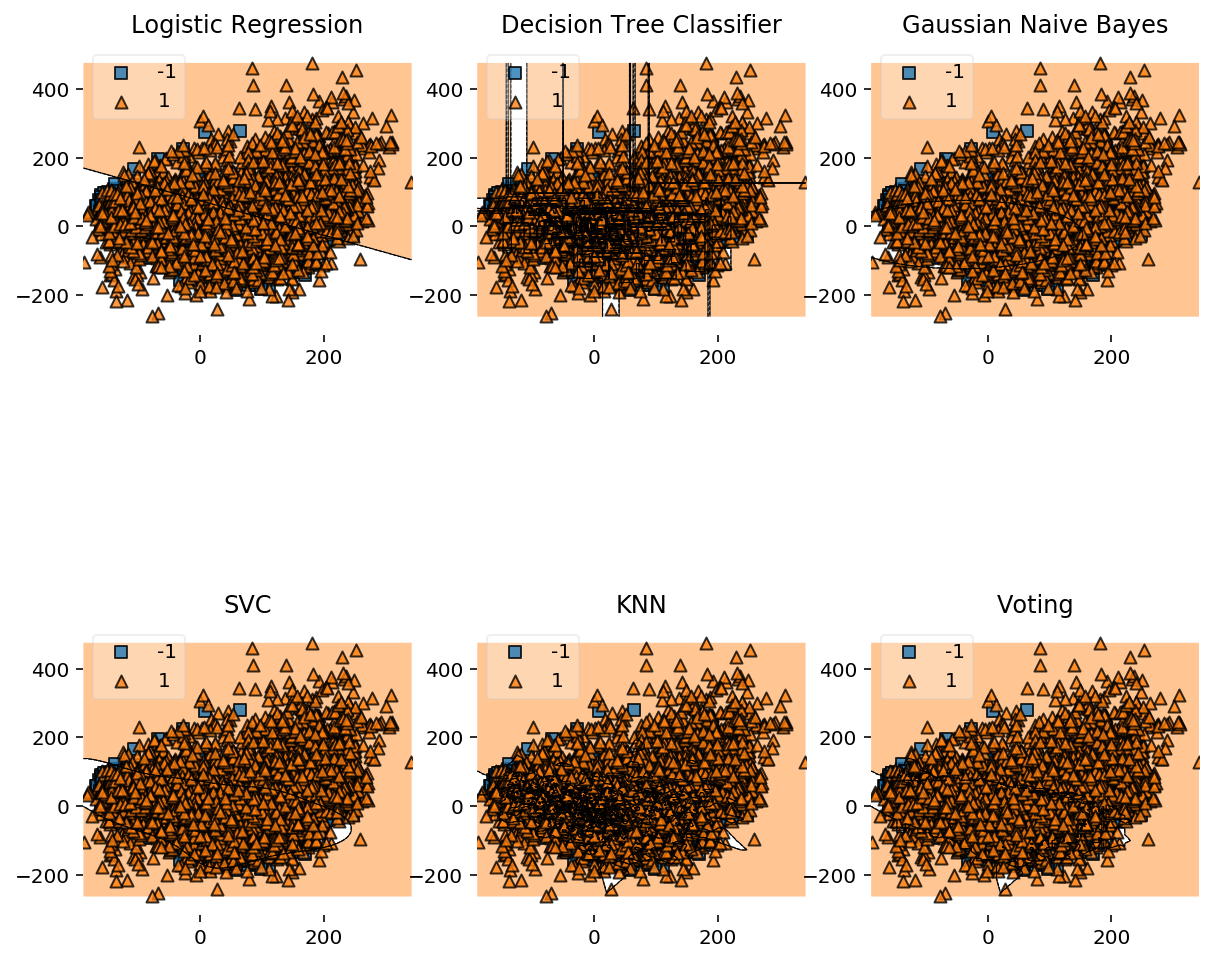

In [30]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

gs = gridspec.GridSpec(nrows=2, ncols=3, hspace =1)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression','Decision Tree Classifier','Gaussian Naive Bayes','SVC','KNN','Voting']

#labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip(classifiers,
                         labels,
                         itertools.product([0,1],[0,1,2])):

    clf.fit(X_train3, Y_train3)
    Y_pred3 = clf.predict(X_test3) 
    print('classifier: {}'.format(lab))
    acc1 = 1-calc_error(X_test3,Y_test3, clf)
    f1 = f1_score(Y_test3, Y_pred3, average = 'binary')
    roc1 = roc_auc_score(Y_test3, Y_pred3)
    print('{} &'.format(acc1),'{}&'.format(f1),'{}'.format(roc1))
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_test3, y=Y_test3, clf=clf, legend=2)
    plt.title(lab)
    
plt.show()

# Classifiers on Data 4

(245057, 2)
(245057, 1)


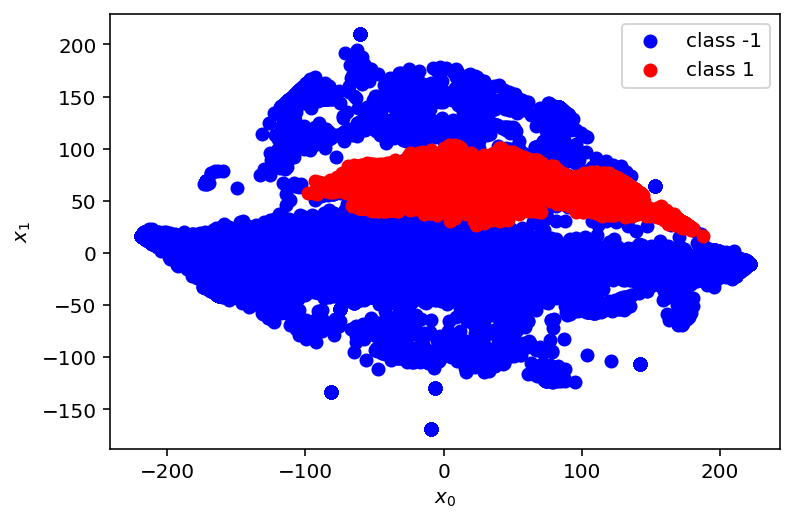

(49011, 2)
(196046,)


In [31]:
data_four = data_four.iloc[:,:]
X = data_four[[1,2]].values
Y = data_four[[3]].values
X_and_Y = np.hstack((X, Y)) # Stack them together for shuffling.
np.random.seed(1) # Set the random seed.
np.random.shuffle(X_and_Y) # Shuffle the data points in X_and_Y array
print(X.shape)      
print(Y.shape)      

X_shuffled = X_and_Y[:,:2]
Y_shuffled = X_and_Y[:,2]
Y_shuffled = Y_shuffled.astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X_shuffled,  
                                                    Y_shuffled,  
                                                    test_size = 0.8,  
                                                    random_state = 42) 
vis(X_train,Y_train)
print(X_train.shape)      
print(Y_test.shape) 

In [32]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

labels = ['Logistic Regression','Decision Tree Classifier','Gaussian Naive Bayes','SVC','KNN','Voting']

#labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip(classifiers,
                         labels,
                         itertools.product([0,1],[0,1,2])):

    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test) 
    print('classifier: {}'.format(lab))
    acc1 = 1-calc_error(X_test,Y_test, clf)
    f1 = f1_score(Y_test, Y_pred, average = 'binary')
    roc1 = roc_auc_score(Y_test, Y_pred)
    print('{} &'.format(acc1),'{}&'.format(f1),'{}'.format(roc1))

classifier: Logistic Regression
0.9120716566520103 & 0.7920426579163249& 0.8726845051410265
classifier: Decision Tree Classifier
0.9898799261397835 & 0.9756731570945117& 0.9847473099065821
classifier: Gaussian Naive Bayes
0.9594788978096978 & 0.9020323599052881& 0.9364851132118235
classifier: SVC
0.9798924742152352 & 0.9537866354044549& 0.9865198740297947
classifier: KNN
0.9897524050477949 & 0.9753747717048895& 0.9846758552973818
classifier: Voting
0.9848708976464707 & 0.9645926845573488& 0.9871480369433844


(245057, 2)
(245057, 1)


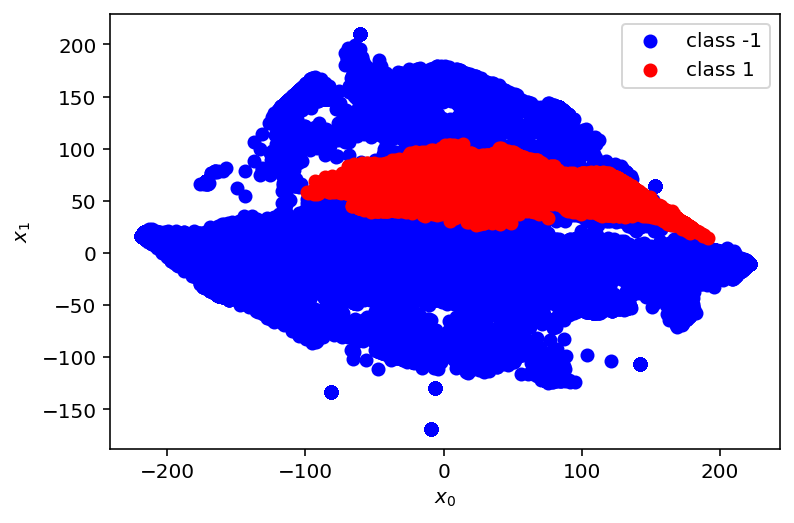

(122528, 2)
(122529,)


In [33]:
data_four = data_four.iloc[:,:]
X = data_four[[1,2]].values
Y = data_four[[3]].values
X_and_Y = np.hstack((X, Y)) # Stack them together for shuffling.
np.random.seed(1) # Set the random seed.
np.random.shuffle(X_and_Y) # Shuffle the data points in X_and_Y array
print(X.shape)      
print(Y.shape)      

X_shuffled = X_and_Y[:,:2]
Y_shuffled = X_and_Y[:,2]
Y_shuffled = Y_shuffled.astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X_shuffled,  
                                                    Y_shuffled,  
                                                    test_size = 0.5,  
                                                    random_state = 42) 
vis(X_train,Y_train)
print(X_train.shape)      
print(Y_test.shape) 

In [34]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

labels = ['Logistic Regression','Decision Tree Classifier','Gaussian Naive Bayes','SVC','KNN','Voting']

#labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip(classifiers,
                         labels,
                         itertools.product([0,1],[0,1,2])):

    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test) 
    print('classifier: {}'.format(lab))
    acc1 = 1-calc_error(X_test,Y_test, clf)
    f1 = f1_score(Y_test, Y_pred, average = 'binary')
    roc1 = roc_auc_score(Y_test, Y_pred)
    print('{} &'.format(acc1),'{}&'.format(f1),'{}'.format(roc1))

classifier: Logistic Regression
0.9111638877327 & 0.7903707270101108& 0.8712048223002427
classifier: Decision Tree Classifier
0.9921651200940186 & 0.9812565894802607& 0.9887565879152828
classifier: Gaussian Naive Bayes
0.9595605938186063 & 0.9024970975422578& 0.9365177880050991
classifier: SVC
0.9806249948991668 & 0.9555064097758453& 0.9866781706785704
classifier: KNN
0.9917488920990133 & 0.9802465758777671& 0.987859973797083
classifier: Voting
0.9860359588342351 & 0.9673653893837381& 0.988196118924509


(245057, 2)
(245057, 1)


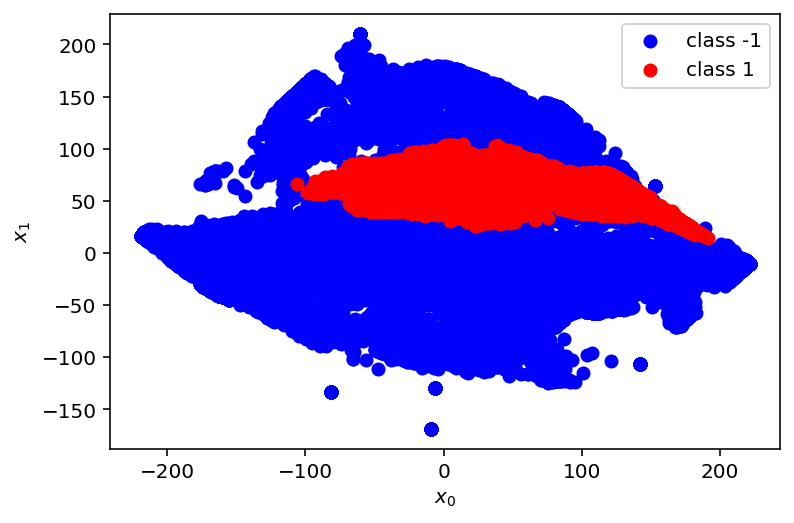

(196045, 2)
(49012,)


In [36]:
data_four = data_four.iloc[:,:]
X = data_four[[1,2]].values
Y = data_four[[3]].values
X_and_Y = np.hstack((X, Y)) # Stack them together for shuffling.
np.random.seed(1) # Set the random seed.
np.random.shuffle(X_and_Y) # Shuffle the data points in X_and_Y array
print(X.shape)      
print(Y.shape)      

X_shuffled = X_and_Y[:,:2]
Y_shuffled = X_and_Y[:,2]
Y_shuffled = Y_shuffled.astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X_shuffled,  
                                                    Y_shuffled,  
                                                    test_size = 0.2,  
                                                    random_state = 42) 
vis(X_train,Y_train)
print(X_train.shape)      
print(Y_test.shape) 

In [37]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

labels = ['Logistic Regression','Decision Tree Classifier','Gaussian Naive Bayes','SVC','KNN','Voting']

#labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip(classifiers,
                         labels,
                         itertools.product([0,1],[0,1,2])):

    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test) 
    print('classifier: {}'.format(lab))
    acc1 = 1-calc_error(X_test,Y_test, clf)
    f1 = f1_score(Y_test, Y_pred, average = 'binary')
    roc1 = roc_auc_score(Y_test, Y_pred)
    print('{} &'.format(acc1),'{}&'.format(f1),'{}'.format(roc1))

classifier: Logistic Regression
0.9118379172447564 & 0.7901917941247876& 0.8714718999533048
classifier: Decision Tree Classifier
0.9933485676977066 & 0.9839393043649619& 0.9902654526661566
classifier: Gaussian Naive Bayes
0.9588876193585244 & 0.8999354422207877& 0.9348183953756929
classifier: SVC
0.9811474740879784 & 0.9563037926794665& 0.987131102134882
classifier: KNN
0.9930833265322778 & 0.9832996699344795& 0.9898795018415059
classifier: Voting
0.9864727005631274 & 0.9681050656660413& 0.9887016927373589


(245057, 2)
(245057, 1)


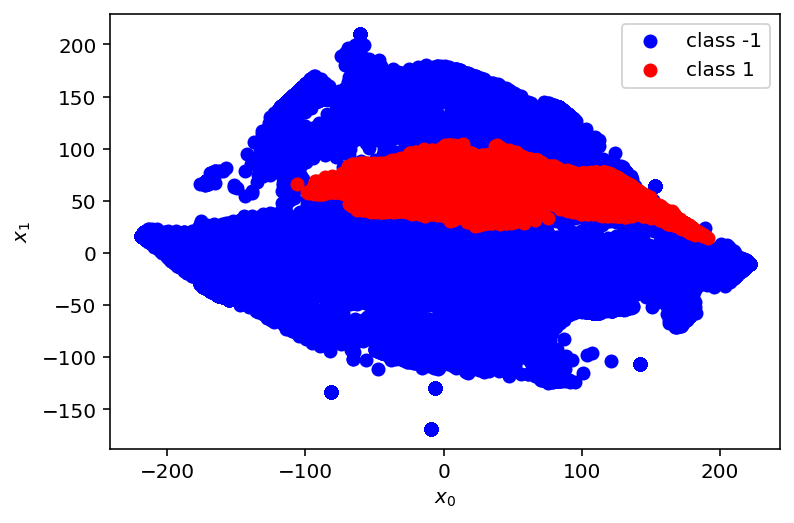

(220551, 2)
(24506,)


In [38]:
data_four = data_four.iloc[:,:]
X = data_four[[1,2]].values
Y = data_four[[3]].values
X_and_Y = np.hstack((X, Y)) # Stack them together for shuffling.
np.random.seed(1) # Set the random seed.
np.random.shuffle(X_and_Y) # Shuffle the data points in X_and_Y array
print(X.shape)      
print(Y.shape)      

X_shuffled = X_and_Y[:,:2]
Y_shuffled = X_and_Y[:,2]
Y_shuffled = Y_shuffled.astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X_shuffled,  
                                                    Y_shuffled,  
                                                    test_size = 0.1,  
                                                    random_state = 42) 
vis(X_train,Y_train)
print(X_train.shape)      
print(Y_test.shape) 

In [39]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

labels = ['Logistic Regression','Decision Tree Classifier','Gaussian Naive Bayes','SVC','KNN','Voting']

#labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip(classifiers,
                         labels,
                         itertools.product([0,1],[0,1,2])):

    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test) 
    print('classifier: {}'.format(lab))
    acc1 = 1-calc_error(X_test,Y_test, clf)
    f1 = f1_score(Y_test, Y_pred, average = 'binary')
    roc1 = roc_auc_score(Y_test, Y_pred)
    print('{} &'.format(acc1),'{}&'.format(f1),'{}'.format(roc1))

classifier: Logistic Regression
0.9118175140781849 & 0.791590317291928& 0.8732155315364627
classifier: Decision Tree Classifier
0.9938382436954215 & 0.985168451036244& 0.9911029965855879
classifier: Gaussian Naive Bayes
0.9573573818656655 & 0.8966676554929299& 0.9331654524653112
classifier: SVC
0.9799232840936913 & 0.9537333082565358& 0.9863901023610674
classifier: KNN
0.9933077613645638 & 0.9838994698605931& 0.9904779095400748
classifier: Voting
0.9862074593976985 & 0.967612111920276& 0.988757395982283


(245057, 2)
(245057, 1)


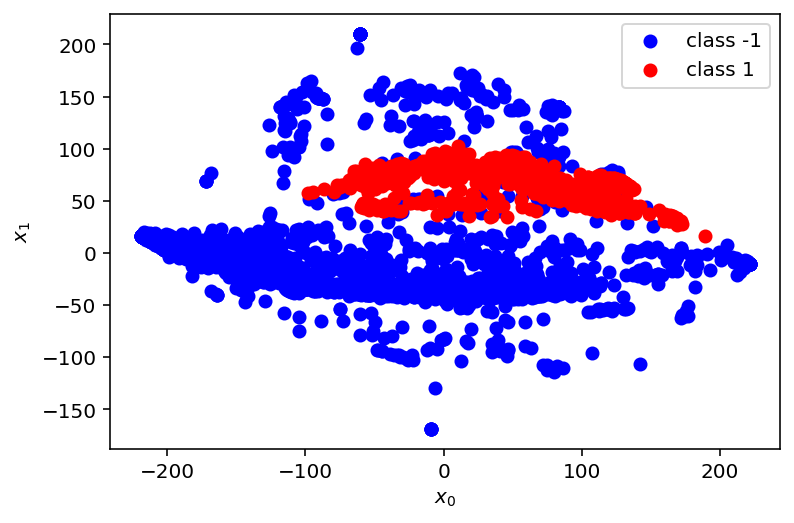

(5000, 2)
(240057,)


In [40]:
data_four = data_four.iloc[:,:]
X = data_four[[1,2]].values
Y = data_four[[3]].values
X_and_Y = np.hstack((X, Y)) # Stack them together for shuffling.
np.random.seed(1) # Set the random seed.
np.random.shuffle(X_and_Y) # Shuffle the data points in X_and_Y array
print(X.shape)      
print(Y.shape)      

X_shuffled = X_and_Y[:,:2]
Y_shuffled = X_and_Y[:,2]
Y_shuffled = Y_shuffled.astype(int)
X_train = X_shuffled[:5000]
Y_train = Y_shuffled[:5000]
X_test = X_shuffled[5000:]
Y_test = Y_shuffled[5000:]
vis(X_train,Y_train)
print(X_train.shape)      
print(Y_test.shape) 

In [41]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

labels = ['Logistic Regression','Decision Tree Classifier','Gaussian Naive Bayes','SVC','KNN','Voting']

#labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip(classifiers,
                         labels,
                         itertools.product([0,1],[0,1,2])):

    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test) 
    print('classifier: {}'.format(lab))
    acc1 = 1-calc_error(X_test,Y_test, clf)
    f1 = f1_score(Y_test, Y_pred, average = 'binary')
    roc1 = roc_auc_score(Y_test, Y_pred)
    print('{} &'.format(acc1),'{}&'.format(f1),'{}'.format(roc1))

classifier: Logistic Regression
0.9066971594246367 & 0.7752919459047314& 0.8581611252434447
classifier: Decision Tree Classifier
0.9816251973489629 & 0.9559301036057187& 0.9735490660302815
classifier: Gaussian Naive Bayes
0.9591305398301236 & 0.9001435099897203& 0.9325589150706107
classifier: SVC
0.9766055561804071 & 0.9466433579721436& 0.9850301126536313
classifier: KNN
0.9838246749730273 & 0.9610956927731968& 0.9758474541792432
classifier: Voting
0.9814585702562308 & 0.9566850592162244& 0.9831701738300747
